# Tensorflow vs numpy

In [1]:
import numpy as np
a=1
b=2
c=a+b
print(c)

3


In [2]:
import tensorflow as tf
a = tf.constant(1)
b = tf.constant(2)
c= a+b
print(c)

Tensor("add:0", shape=(), dtype=int32)


Tensorflow defines a computational graph.

The graph has no value until evaluated

In [3]:
a = tf.constant(1)
b = 2
c= a+b
print(c)

Tensor("add_1:0", shape=(), dtype=int32)


In [4]:
sess = tf.Session()
s = sess.run(c)
print(s)
sess.close()

3


In [5]:
with tf.Session() as sess:
    s = sess.run(c)
    print(s)

3


# Tensorflow program:  two phases
1. Define a computational graph
2. Execution:
    Done by session object.
    A session object encapsulates the environment in which tensor objects are evaluated


In [6]:
#Program to find the sum and difference of two numbers
a = 1
b = 2
Sum = tf.add(a,b) 
Diff = tf.subtract(a,b)
sess = tf.Session()
S = sess.run(Sum)
D = sess.run(Diff)
print(S,D)


3 -1


In [7]:
S, D = sess.run([Sum, Diff])
print(S,D)

3 -1


# Tensorflow variables

In [8]:
w1  = tf.Variable(tf.zeros(2,3))
w = sess.run(w1)
print(w)
sess.close()

Instructions for updating:
Colocations handled automatically by placer.


FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[{{node _retval_Variable_0_0}}]]

In [9]:
w1  = tf.Variable(tf.zeros((2,2)))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
w = sess.run(w1)
print(w)


[[0. 0.]
 [0. 0.]]


In [10]:
w1  = tf.Variable(tf.random_normal((2,2)))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
w = sess.run(w1)
print(w)
sess.close()

[[-1.477922  -1.1649964]
 [-1.8237928  0.6413012]]


# Feeding values to tensors

In [11]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c= a+b
sess = tf.Session()
S = sess.run(c, feed_dict={a:1,b:2})
print(S)
sess.close()

3.0


In [12]:
x = tf.placeholder(tf.float32, [2,2])
y = tf.placeholder(tf.float32,[2,2])
z = x * y
u = tf.multiply(x,y)
v = tf.matmul(x,y)
sess = tf.Session()
A1 = np.array([[1, 2],[3, 4]])
print(A1)
A2 = np.array([[2,0],[0,2]])
print(A2)
p1, p2, p3 = sess.run([z, u, v], feed_dict={x:A1, y:A2})
print("p1:\n",p1)
print("p1:\n",p2)
print("p1:\n",p3)


[[1 2]
 [3 4]]
[[2 0]
 [0 2]]
p1:
 [[2. 0.]
 [0. 8.]]
p1:
 [[2. 0.]
 [0. 8.]]
p1:
 [[2. 4.]
 [6. 8.]]


In [13]:
row_sum = tf.reduce_sum(x, axis=1)
col_sum = tf.reduce_sum(x, axis=0)
row_mean = tf.reduce_mean(x, axis=0)
col_mean = tf.reduce_mean(x, axis=1)
A1 = np.array([[1, 2],[3, 4]])
print(A1)
row_sum_, col_sum_, row_mean_, col_mean_ = sess.run([row_sum, col_sum, row_mean, col_mean], 
                                                    feed_dict = {x:A1})

[[1 2]
 [3 4]]


In [14]:
print(row_sum_)

[3. 7.]


In [15]:
print(col_sum_)

[4. 6.]


In [16]:
print(row_mean_)

[2. 3.]


In [17]:
print(col_mean_)

[1.5 3.5]


# Logistic regression: AND Gate


In [18]:
import matplotlib.pyplot as plt

#placeholder for input and output 
X = tf.placeholder(tf.float32, shape=[4, 2])
Y = tf.placeholder(tf.float32, shape=[4, 1])
 
#Define and initialize variables
W = tf.Variable(tf.zeros([2, 1]), tf.float32)
B = tf.Variable(tf.zeros([1, 1]), tf.float32)
 
#Predict the output
logit = tf.add(tf.matmul(X, W), B)
prob = tf.nn.sigmoid(logit)

#Loss
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logit))

#Minimize loss using GradientDescentOptimizer with a learning rate of 0.1
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)


sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

#Dataset
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], np.float32) # 4x2, input
y = np.array([0, 0, 0, 1]) # 4, correct output, AND operation
y = np.reshape(y, [4,1]) # convert to 4x1

#Training
for i in range(2000):
    cost, t =sess.run([loss,train], feed_dict={X: x, Y: y})
    print(t)
    print('Epoch--',i,'--loss--',cost)

y_prob, W_, B_ = sess.run([prob, W, B],feed_dict={X: x, Y: y})   
print("Prob:",y_prob)

W_= np.squeeze(W_)
B_ = np.squeeze(B_)


print('W: ' + str(W_))
print('b: ' + str(B_))

sess.close()

 


None
Epoch-- 0 --loss-- 0.6931472
None
Epoch-- 1 --loss-- 0.68697524
None
Epoch-- 2 --loss-- 0.6811043
None
Epoch-- 3 --loss-- 0.67551196
None
Epoch-- 4 --loss-- 0.6701778
None
Epoch-- 5 --loss-- 0.66508293
None
Epoch-- 6 --loss-- 0.6602098
None
Epoch-- 7 --loss-- 0.65554225
None
Epoch-- 8 --loss-- 0.65106535
None
Epoch-- 9 --loss-- 0.6467655
None
Epoch-- 10 --loss-- 0.64262986
None
Epoch-- 11 --loss-- 0.6386468
None
Epoch-- 12 --loss-- 0.63480556
None
Epoch-- 13 --loss-- 0.63109624
None
Epoch-- 14 --loss-- 0.6275097
None
Epoch-- 15 --loss-- 0.6240374
None
Epoch-- 16 --loss-- 0.62067175
None
Epoch-- 17 --loss-- 0.61740535
None
Epoch-- 18 --loss-- 0.6142318
None
Epoch-- 19 --loss-- 0.6111449
None
Epoch-- 20 --loss-- 0.60813904
None
Epoch-- 21 --loss-- 0.6052092
None
Epoch-- 22 --loss-- 0.60235035
None
Epoch-- 23 --loss-- 0.5995581
None
Epoch-- 24 --loss-- 0.5968285
None
Epoch-- 25 --loss-- 0.5941578
None
Epoch-- 26 --loss-- 0.5915423
None
Epoch-- 27 --loss-- 0.588979
None
Epoch-- 28 --l

None
Epoch-- 273 --loss-- 0.3160544
None
Epoch-- 274 --loss-- 0.31550208
None
Epoch-- 275 --loss-- 0.31495184
None
Epoch-- 276 --loss-- 0.3144038
None
Epoch-- 277 --loss-- 0.31385785
None
Epoch-- 278 --loss-- 0.31331402
None
Epoch-- 279 --loss-- 0.31277227
None
Epoch-- 280 --loss-- 0.31223264
None
Epoch-- 281 --loss-- 0.31169507
None
Epoch-- 282 --loss-- 0.31115958
None
Epoch-- 283 --loss-- 0.3106261
None
Epoch-- 284 --loss-- 0.3100947
None
Epoch-- 285 --loss-- 0.3095653
None
Epoch-- 286 --loss-- 0.30903792
None
Epoch-- 287 --loss-- 0.3085125
None
Epoch-- 288 --loss-- 0.3079891
None
Epoch-- 289 --loss-- 0.30746767
None
Epoch-- 290 --loss-- 0.30694818
None
Epoch-- 291 --loss-- 0.30643064
None
Epoch-- 292 --loss-- 0.30591506
None
Epoch-- 293 --loss-- 0.3054014
None
Epoch-- 294 --loss-- 0.30488968
None
Epoch-- 295 --loss-- 0.30437982
None
Epoch-- 296 --loss-- 0.30387187
None
Epoch-- 297 --loss-- 0.3033658
None
Epoch-- 298 --loss-- 0.30286157
None
Epoch-- 299 --loss-- 0.30235922
None
Epoch

None
Epoch-- 554 --loss-- 0.2144742
None
Epoch-- 555 --loss-- 0.2142348
None
Epoch-- 556 --loss-- 0.21399596
None
Epoch-- 557 --loss-- 0.21375766
None
Epoch-- 558 --loss-- 0.21351995
None
Epoch-- 559 --loss-- 0.21328276
None
Epoch-- 560 --loss-- 0.21304612
None
Epoch-- 561 --loss-- 0.21281004
None
Epoch-- 562 --loss-- 0.21257448
None
Epoch-- 563 --loss-- 0.21233949
None
Epoch-- 564 --loss-- 0.212105
None
Epoch-- 565 --loss-- 0.21187106
None
Epoch-- 566 --loss-- 0.21163768
None
Epoch-- 567 --loss-- 0.21140477
None
Epoch-- 568 --loss-- 0.21117243
None
Epoch-- 569 --loss-- 0.2109406
None
Epoch-- 570 --loss-- 0.2107093
None
Epoch-- 571 --loss-- 0.21047854
None
Epoch-- 572 --loss-- 0.21024829
None
Epoch-- 573 --loss-- 0.21001858
None
Epoch-- 574 --loss-- 0.20978937
None
Epoch-- 575 --loss-- 0.20956066
None
Epoch-- 576 --loss-- 0.2093325
None
Epoch-- 577 --loss-- 0.20910484
None
Epoch-- 578 --loss-- 0.20887768
None
Epoch-- 579 --loss-- 0.20865102
None
Epoch-- 580 --loss-- 0.2084249
None
Epoc

None
Epoch-- 821 --loss-- 0.16540924
None
Epoch-- 822 --loss-- 0.16526788
None
Epoch-- 823 --loss-- 0.1651268
None
Epoch-- 824 --loss-- 0.16498592
None
Epoch-- 825 --loss-- 0.1648453
None
Epoch-- 826 --loss-- 0.16470492
None
Epoch-- 827 --loss-- 0.16456476
None
Epoch-- 828 --loss-- 0.16442484
None
Epoch-- 829 --loss-- 0.16428517
None
Epoch-- 830 --loss-- 0.16414572
None
Epoch-- 831 --loss-- 0.1640065
None
Epoch-- 832 --loss-- 0.16386753
None
Epoch-- 833 --loss-- 0.1637288
None
Epoch-- 834 --loss-- 0.16359031
None
Epoch-- 835 --loss-- 0.16345203
None
Epoch-- 836 --loss-- 0.16331398
None
Epoch-- 837 --loss-- 0.16317618
None
Epoch-- 838 --loss-- 0.1630386
None
Epoch-- 839 --loss-- 0.16290125
None
Epoch-- 840 --loss-- 0.16276415
None
Epoch-- 841 --loss-- 0.16262725
None
Epoch-- 842 --loss-- 0.16249059
None
Epoch-- 843 --loss-- 0.16235417
None
Epoch-- 844 --loss-- 0.16221794
None
Epoch-- 845 --loss-- 0.16208199
None
Epoch-- 846 --loss-- 0.16194624
None
Epoch-- 847 --loss-- 0.1618107
None
Ep

None
Epoch-- 1103 --loss-- 0.1331962
None
Epoch-- 1104 --loss-- 0.13310392
None
Epoch-- 1105 --loss-- 0.13301176
None
Epoch-- 1106 --loss-- 0.13291973
None
Epoch-- 1107 --loss-- 0.13282782
None
Epoch-- 1108 --loss-- 0.13273603
None
Epoch-- 1109 --loss-- 0.13264436
None
Epoch-- 1110 --loss-- 0.13255283
None
Epoch-- 1111 --loss-- 0.13246143
None
Epoch-- 1112 --loss-- 0.13237013
None
Epoch-- 1113 --loss-- 0.13227896
None
Epoch-- 1114 --loss-- 0.13218793
None
Epoch-- 1115 --loss-- 0.132097
None
Epoch-- 1116 --loss-- 0.1320062
None
Epoch-- 1117 --loss-- 0.13191554
None
Epoch-- 1118 --loss-- 0.13182499
None
Epoch-- 1119 --loss-- 0.13173455
None
Epoch-- 1120 --loss-- 0.13164423
None
Epoch-- 1121 --loss-- 0.13155404
None
Epoch-- 1122 --loss-- 0.13146397
None
Epoch-- 1123 --loss-- 0.13137402
None
Epoch-- 1124 --loss-- 0.13128419
None
Epoch-- 1125 --loss-- 0.13119447
None
Epoch-- 1126 --loss-- 0.13110489
None
Epoch-- 1127 --loss-- 0.13101542
None
Epoch-- 1128 --loss-- 0.13092606
None
Epoch-- 112

None
Epoch-- 1381 --loss-- 0.111584306
None
Epoch-- 1382 --loss-- 0.11151889
None
Epoch-- 1383 --loss-- 0.11145353
None
Epoch-- 1384 --loss-- 0.11138827
None
Epoch-- 1385 --loss-- 0.11132306
None
Epoch-- 1386 --loss-- 0.11125794
None
Epoch-- 1387 --loss-- 0.11119288
None
Epoch-- 1388 --loss-- 0.111127906
None
Epoch-- 1389 --loss-- 0.111063
None
Epoch-- 1390 --loss-- 0.110998176
None
Epoch-- 1391 --loss-- 0.110933416
None
Epoch-- 1392 --loss-- 0.11086873
None
Epoch-- 1393 --loss-- 0.11080413
None
Epoch-- 1394 --loss-- 0.11073958
None
Epoch-- 1395 --loss-- 0.11067513
None
Epoch-- 1396 --loss-- 0.11061072
None
Epoch-- 1397 --loss-- 0.1105464
None
Epoch-- 1398 --loss-- 0.11048216
None
Epoch-- 1399 --loss-- 0.11041798
None
Epoch-- 1400 --loss-- 0.11035389
None
Epoch-- 1401 --loss-- 0.11028984
None
Epoch-- 1402 --loss-- 0.1102259
None
Epoch-- 1403 --loss-- 0.11016201
None
Epoch-- 1404 --loss-- 0.11009819
None
Epoch-- 1405 --loss-- 0.11003445
None
Epoch-- 1406 --loss-- 0.10997078
None
Epoch--

None
Epoch-- 1665 --loss-- 0.09557908
None
Epoch-- 1666 --loss-- 0.095530584
None
Epoch-- 1667 --loss-- 0.09548214
None
Epoch-- 1668 --loss-- 0.09543375
None
Epoch-- 1669 --loss-- 0.095385395
None
Epoch-- 1670 --loss-- 0.09533709
None
Epoch-- 1671 --loss-- 0.095288835
None
Epoch-- 1672 --loss-- 0.09524062
None
Epoch-- 1673 --loss-- 0.09519248
None
Epoch-- 1674 --loss-- 0.09514435
None
Epoch-- 1675 --loss-- 0.09509628
None
Epoch-- 1676 --loss-- 0.09504826
None
Epoch-- 1677 --loss-- 0.0950003
None
Epoch-- 1678 --loss-- 0.094952375
None
Epoch-- 1679 --loss-- 0.09490448
None
Epoch-- 1680 --loss-- 0.09485665
None
Epoch-- 1681 --loss-- 0.09480887
None
Epoch-- 1682 --loss-- 0.09476113
None
Epoch-- 1683 --loss-- 0.094713435
None
Epoch-- 1684 --loss-- 0.094665796
None
Epoch-- 1685 --loss-- 0.09461819
None
Epoch-- 1686 --loss-- 0.09457064
None
Epoch-- 1687 --loss-- 0.094523124
None
Epoch-- 1688 --loss-- 0.09447567
None
Epoch-- 1689 --loss-- 0.09442825
None
Epoch-- 1690 --loss-- 0.094380885
None


None
Epoch-- 1934 --loss-- 0.084051356
None
Epoch-- 1935 --loss-- 0.08401353
None
Epoch-- 1936 --loss-- 0.08397573
None
Epoch-- 1937 --loss-- 0.08393796
None
Epoch-- 1938 --loss-- 0.083900236
None
Epoch-- 1939 --loss-- 0.08386254
None
Epoch-- 1940 --loss-- 0.08382487
None
Epoch-- 1941 --loss-- 0.08378725
None
Epoch-- 1942 --loss-- 0.08374964
None
Epoch-- 1943 --loss-- 0.08371207
None
Epoch-- 1944 --loss-- 0.08367453
None
Epoch-- 1945 --loss-- 0.08363703
None
Epoch-- 1946 --loss-- 0.08359955
None
Epoch-- 1947 --loss-- 0.08356212
None
Epoch-- 1948 --loss-- 0.08352472
None
Epoch-- 1949 --loss-- 0.08348735
None
Epoch-- 1950 --loss-- 0.08345
None
Epoch-- 1951 --loss-- 0.083412685
None
Epoch-- 1952 --loss-- 0.08337541
None
Epoch-- 1953 --loss-- 0.08333817
None
Epoch-- 1954 --loss-- 0.08330096
None
Epoch-- 1955 --loss-- 0.08326378
None
Epoch-- 1956 --loss-- 0.08322663
None
Epoch-- 1957 --loss-- 0.08318951
None
Epoch-- 1958 --loss-- 0.08315243
None
Epoch-- 1959 --loss-- 0.08311537
None
Epoch--

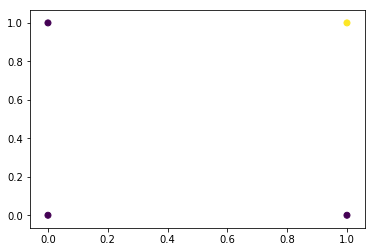

In [19]:
# Replace probabilities with lables for comparison
y_pred = np.where(y_prob<0.5,0,1)
plt.scatter(x[:, 0], x[:, 1], c=np.ravel(y_pred))
plt.show()


# Make moons dataset classification

In [20]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

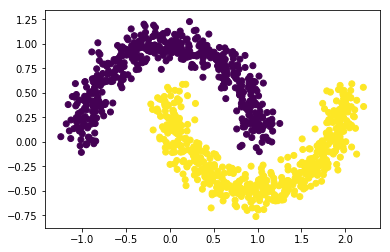

Iter:  0  Loss: 0.7438858
Iter:  100  Loss: 0.70866925
Iter:  200  Loss: 0.6962479
Iter:  300  Loss: 0.6903076
Iter:  400  Loss: 0.68579507
Iter:  500  Loss: 0.6810814
Iter:  600  Loss: 0.67534536
Iter:  700  Loss: 0.6682046
Iter:  800  Loss: 0.65985036
Iter:  900  Loss: 0.6509509
Iter:  1000  Loss: 0.6422221
Iter:  1100  Loss: 0.6341505
Iter:  1200  Loss: 0.6269635
Iter:  1300  Loss: 0.6206936
Iter:  1400  Loss: 0.6152646
Iter:  1500  Loss: 0.610559
Iter:  1600  Loss: 0.60645735
Iter:  1700  Loss: 0.6028543
Iter:  1800  Loss: 0.599663
Iter:  1900  Loss: 0.59681416
Iter:  2000  Loss: 0.5942527
Iter:  2100  Loss: 0.5919353
Iter:  2200  Loss: 0.5898274
Iter:  2300  Loss: 0.5879017
Iter:  2400  Loss: 0.5861358
Iter:  2500  Loss: 0.58451134
Iter:  2600  Loss: 0.5830132
Iter:  2700  Loss: 0.58162856
Iter:  2800  Loss: 0.5803466
Iter:  2900  Loss: 0.57915807
Iter:  3000  Loss: 0.57805467
Iter:  3100  Loss: 0.5770293
Iter:  3200  Loss: 0.5760755
Iter:  3300  Loss: 0.5751875
Iter:  3400  Loss:

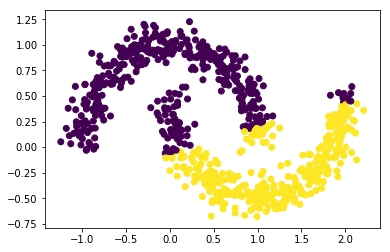

In [21]:
X, Y = make_moons(1000, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()


# Split into test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=73)
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

# Define network dimensions
N = X_train.shape[0]
x_dim = X_train.shape[1]
y_dim = 1

X = tf.placeholder(tf.float32, [None, x_dim])
Y = tf.placeholder(tf.float32, [None, y_dim])

initializer = tf.contrib.layers.xavier_initializer()
hidden1 = fully_connected(X, 10, activation_fn=tf.nn.sigmoid,
                         weights_initializer=initializer)

logits = fully_connected(hidden1, 1, activation_fn=tf.nn.sigmoid,
                        weights_initializer=initializer)


#Loss
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))

#Minimize loss using GradientDescentOptimizer with a learning rate of 0.001
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# Initialize list to store cost results
iter_cost = []
iters = 10001

# Initialize global variables
init = tf.global_variables_initializer()
# Start session and run loop
with tf.Session() as sess:
    sess.run(init)
    
    # Run training loop
    for i in range(iters):
        _, cost = sess.run([train, loss],
                       feed_dict={X:X_train, Y:Y_train})
        if i%100 ==0:
            print("Iter: ",i," Loss:", cost)
        
        # Append the cost
        iter_cost.append(cost)
        
    
    # Make prediction
    y_prob = sess.run(logits,
                    feed_dict={X:X_train, Y:Y_train})
    
    # Replace probabilities with labels for comparison
    y_hat = np.where(y_prob<0.5,0,1)
    # Get prediction accuracy
    acc = np.sum(Y_train==y_hat) / len(Y_train)
    print("Train Accuracy %.2f" %acc)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_hat.ravel())
plt.show()



